# GSE176078 Exploration

## Table of Contents
1. [Imports](#imports)
2. [Path for Assets](#path-for-assets)
2. [Data Loading](#data-loading)
3. [OBS File Generation](#OBS-File-Generation)

## Imports

In [1]:
# Necessary imports for the notebook.
import os
from scipy.io import mmread
import pandas as pd
import scanpy as sc
import numpy as np
import urllib.request
from gtfparse import read_gtf
import infercnvpy as cnv
import matplotlib.pyplot as plt
import seaborn as sns

a:\Capstone Local-GIt\ghost-cell-busters\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Path for Assets

In [2]:
# This is the relative path of the assets directory, if the assets are in another location please change the path accordingly.
assets = "../assets/"

The following code block contains the necessary data imports.

In [3]:
X = mmread(f"""{assets}GSE176078/count_matrix_sparse.mtx""").tocsr().T
X

<Compressed Sparse Column sparse matrix of dtype 'int64'
	with 177994136 stored elements and shape (100064, 29733)>

In [4]:
# Create AnnData
adata = sc.AnnData(X)
adata

AnnData object with n_obs × n_vars = 100064 × 29733

In [5]:
# Load genes
genes = pd.read_csv(f"""{assets}GSE176078/count_matrix_genes.tsv""", sep="\t", header=None)
genes.columns = ["gene_id"]
genes.head()

,gene_id
0,RP11-34P13.7
1,FO538757.3
2,FO538757.2
3,AP006222.2
4,RP4-669L17.10


In [6]:
# Load barcodes
barcodes = pd.read_csv(f"""{assets}GSE176078/count_matrix_barcodes.tsv""", sep="\t", header=None)
barcodes.columns = ["cell_id"]
barcodes.head()

,cell_id
0,CID3586_AAGACCTCAGCATGAG
1,CID3586_AAGGTTCGTAGTACCT
2,CID3586_ACCAGTAGTTGTGGCC
3,CID3586_ACCCACTAGATGTCGG
4,CID3586_ACTGATGGTCAACTGT


In [7]:
# Load metadata
metadata = pd.read_csv(f"""{assets}GSE176078/metadata.csv""")
metadata.head()

,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,subtype,celltype_subset,celltype_minor,celltype_major
0,CID3586_AAGACCTCAGCATGAG,CID3586,4581,1689,1.506221,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial
1,CID3586_AAGGTTCGTAGTACCT,CID3586,1726,779,5.793743,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial
2,CID3586_ACCAGTAGTTGTGGCC,CID3586,1229,514,1.383238,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial
3,CID3586_ACCCACTAGATGTCGG,CID3586,1352,609,1.923077,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial
4,CID3586_ACTGATGGTCAACTGT,CID3586,1711,807,13.325541,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial


In [8]:
# Set .var_names using gene IDs
adata.var_names = genes["gene_id"].astype(str).values
adata.var_names_make_unique()
adata.var.head()

""
RP11-34P13.7
FO538757.3
FO538757.2
AP006222.2
RP4-669L17.10


In [9]:
# Set .obs using barcodes and align metadata
adata.obs_names = barcodes["cell_id"].astype(str).values
metadata.index = adata.obs_names
adata.obs = metadata
adata.obs.head()

,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,subtype,celltype_subset,celltype_minor,celltype_major
CID3586_AAGACCTCAGCATGAG,CID3586_AAGACCTCAGCATGAG,CID3586,4581,1689,1.506221,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial
CID3586_AAGGTTCGTAGTACCT,CID3586_AAGGTTCGTAGTACCT,CID3586,1726,779,5.793743,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial
CID3586_ACCAGTAGTTGTGGCC,CID3586_ACCAGTAGTTGTGGCC,CID3586,1229,514,1.383238,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial
CID3586_ACCCACTAGATGTCGG,CID3586_ACCCACTAGATGTCGG,CID3586,1352,609,1.923077,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial
CID3586_ACTGATGGTCAACTGT,CID3586_ACTGATGGTCAACTGT,CID3586,1711,807,13.325541,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial


In [10]:
adata.obs['celltype_major'].value_counts()

celltype_major
T-cells              35214
Cancer Epithelial    24489
Myeloid               9675
Endothelial           7605
CAFs                  6573
PVL                   5423
Normal Epithelial     4355
Plasmablasts          3524
B-cells               3206
Name: count, dtype: int64

In [11]:
adata.obs['celltype_minor'].value_counts()

celltype_minor
T cells CD4+                   19231
T cells CD8+                   11487
Cancer LumA SC                  7742
Macrophage                      5929
Cancer Cycling                  5359
Endothelial ACKR1               4611
Cancer Basal SC                 4312
Cancer Her2 SC                  3708
Plasmablasts                    3524
PVL Differentiated              3487
CAFs myCAF-like                 3420
Cancer LumB SC                  3368
CAFs MSC iCAF-like              3153
B cells Memory                  2581
Monocyte                        2328
Luminal Progenitors             1992
PVL Immature                    1886
NK cells                        1846
Endothelial CXCL12              1644
Cycling T-cells                 1528
Mature Luminal                  1265
Endothelial RGS5                1147
NKT cells                       1122
Myoepithelial                   1098
DCs                              955
B cells Naive                    625
Cycling_Myeloid        

In [12]:
adata.obs['subtype'].value_counts()

subtype
TNBC     42512
ER+      38241
HER2+    19311
Name: count, dtype: int64

In [13]:
## Cell cycle genes feature in our datset
# Seurat v3 cell cycle gene sets (subset)
s_genes = [
    'MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 'UNG', 'GINS2',
    'MCM6', 'CDCA7', 'DTL', 'PRIM1', 'UHRF1', 'MCM10', 'HELLS', 'RFC2', 'RPA2',
    'NASP', 'RAD51AP1', 'GMNN', 'WDR76', 'SLBP', 'CCNE2', 'UBR7', 'POLD3',
    'MSH2', 'ATAD2', 'RAD51', 'RRM2', 'CDC45', 'CDC6', 'EXO1', 'TIPIN', 'DSCC1',
    'BLM', 'CASP8AP2', 'USP1', 'CLSPN', 'POLA1', 'CHAF1B', 'BRIP1', 'E2F8'
]

g2m_genes = [
    'HMGB2', 'CDK1', 'NUSAP1', 'UBE2C', 'BIRC5', 'TPX2', 'TOP2A', 'NDC80',
    'CKS2', 'NUF2', 'CKS1B', 'MKI67', 'TMPO', 'CENPF', 'TACC3', 'FAM64A',
    'SMC4', 'CCNB2', 'CKAP2L', 'CKAP2', 'AURKB', 'BUB1', 'KIF11', 'ANP32E',
    'TUBB4B', 'GTSE1', 'KIF20B', 'HJURP', 'CDC20', 'TTK', 'CDC25C', 'KIF2C',
    'RANGAP1', 'NCAPD2', 'DLGAP5', 'CDCA3', 'HN1', 'CDC45', 'CDCA8', 'ECT2',
    'KIF23', 'HMMR', 'AURKA', 'PSRC1', 'ANLN', 'LBR', 'CKAP5', 'CENPE',
    'CTCF', 'NEK2', 'G2E3', 'GAS2L3', 'CBX5', 'CENPA'
]
print(len(s_genes))
print(len(g2m_genes))
# Filter for genes present in your dataset
s_genes = [g for g in s_genes if g in adata.var_names]
g2m_genes = [g for g in g2m_genes if g in adata.var_names]

# Compute cell cycle scores
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

# Output: adata.obs now includes:
# 'S_score', 'G2M_score', 'phase'

43
54


In [14]:
## Apoptosis score feature
# Apoptosis gene list (example set — you can refine this)
apoptosis_genes = [
    'BAX', 'BAK1', 'CASP3', 'CASP8', 'BCL2L11', 'FAS', 'TP53', 'BBC3', 'CYCS'
]
apoptosis_genes = [gene for gene in apoptosis_genes if gene in adata.var_names]

# Compute score
sc.tl.score_genes(adata, gene_list=apoptosis_genes, score_name='apoptosis_score')

In [15]:
## % Ribosomal as a feature

# Identify ribosomal genes (common prefixes: RPS, RPL)
ribo_genes = [gene for gene in adata.var_names if gene.startswith('RPS') or gene.startswith('RPL')]

# Total counts per cell
total_counts = adata.X.sum(axis=1).A1 if isinstance(adata.X, np.matrix) or hasattr(adata.X, 'A1') else adata.X.sum(axis=1)

# Ribosomal counts per cell
ribo_counts = adata[:, ribo_genes].X.sum(axis=1).A1 if hasattr(adata[:, ribo_genes].X, 'A1') else adata[:, ribo_genes].X.sum(axis=1)

# Percent ribosomal
adata.obs['pct_counts_ribo'] = (ribo_counts / total_counts) * 100

In [16]:
## Oxphos genes
oxphos_genes = [
    "ATP5F1A", "ATP5F1B", "ATP5MC1", "ATP5MC2", "ATP5ME", "ATP5MG",
    "COX4I1", "COX5A", "COX6A1", "COX6C", "NDUFA1", "NDUFA2", "NDUFA4",
    "NDUFAB1", "NDUFB2", "NDUFB3", "NDUFS1", "NDUFS2", "NDUFV1", "UQCRC1",
    "UQCRC2", "UQCRH", "SDHA", "SDHB", "SDHC", "SDHD", "CYCS"
]
# Filter genes present in the dataset
oxphos_genes_present = [g for g in oxphos_genes if g in adata.var_names]
sc.tl.score_genes(adata, gene_list=oxphos_genes_present, score_name="oxphos_score")

In [17]:
## Protooncogene score
proto_oncogenes = ['MYC', 'KRAS', 'EGFR', 'BRAF', 'AKT1', 'PIK3CA', 'CCND1', 'ERBB2', 'FGFR1', 'MDM2']

# ---------------------------------------
# 🧪 Step 2: Score Proto-oncogene activity
# Filter to genes in adata
valid_protooncogenes = [g for g in proto_oncogenes if g in adata.var_names]
sc.tl.score_genes(adata, gene_list=oxphos_genes_present, score_name="proto_oncogenescore")
print(f"✅ Found {len(valid_protooncogenes)} Proto-oncogenes in dataset: {valid_protooncogenes}")

✅ Found 10 Proto-oncogenes in dataset: ['MYC', 'KRAS', 'EGFR', 'BRAF', 'AKT1', 'PIK3CA', 'CCND1', 'ERBB2', 'FGFR1', 'MDM2']


In [18]:
adata.obs.sample(5)
adata.obs.columns

Index(['Unnamed: 0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA',
       'percent.mito', 'subtype', 'celltype_subset', 'celltype_minor',
       'celltype_major', 'S_score', 'G2M_score', 'phase', 'apoptosis_score',
       'pct_counts_ribo', 'oxphos_score', 'proto_oncogenescore'],
      dtype='object')

In [19]:
# gtf_url = "https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_44/gencode.v44.annotation.gtf.gz"
# gtf_file = "gencode.v44.annotation.gtf.gz"

# if not os.path.exists(gtf_file):
#     print("📥 Downloading GTF file...")
#     urllib.request.urlretrieve(gtf_url, gtf_file)
# else:
#     print("✅ GTF file already exists.")

# Load and filter for gene info
gtf = read_gtf(f"""{assets}gencode.v44.annotation.gtf.gz""").to_pandas()
genes = gtf[gtf["feature"] == "gene"]
gene_pos = genes[["gene_name", "seqname", "start", "end"]].drop_duplicates()
gene_pos.columns = ["gene", "chromosome", "start", "end"]

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'tag', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id', 'hgnc_id', 'havana_gene', 'ont', 'protein_id', 'ccdsid', 'artif_dupl']


In [20]:
##STEP 2: Merge gene location with adata.var
# Match gene names
adata.var["gene"] = adata.var_names
gene_pos_filtered = gene_pos[gene_pos["gene"].isin(adata.var["gene"])].drop_duplicates(subset="gene")
gene_pos_filtered = gene_pos_filtered.set_index("gene")

# Merge and reindex
merged_var = adata.var.join(gene_pos_filtered, on="gene")
merged_var = merged_var.reindex(adata.var_names)
adata.var = merged_var

print("✅ Chromosomal annotations added to adata.var")

✅ Chromosomal annotations added to adata.var


In [21]:
##STEP 3: Define reference group using Normal Epithelial cells
# Create reference labels
adata.obs["cnv_reference"] = "tumor"
adata.obs.loc[adata.obs["celltype_major"] == "Normal Epithelial", "cnv_reference"] = "normal"

print("🔍 CNV reference group counts:\n", adata.obs["cnv_reference"].value_counts())

## STEP 4: Run inferCNV with infercnvpy
cnv.tl.infercnv(
    adata,
    reference_key="cnv_reference",
    reference_cat="normal",
    window_size=100,
    step=10,
    n_jobs=4  # Adjust depending on your CPU
)

print("✅ CNV inference completed.")

🔍 CNV reference group counts:
 cnv_reference
tumor     95709
normal     4355
Name: count, dtype: int64


100%|██████████| 21/21 [01:41<00:00,  4.82s/it]


✅ CNV inference completed.


In [22]:
adata.obs.head(2)

,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,subtype,celltype_subset,celltype_minor,celltype_major,S_score,G2M_score,phase,apoptosis_score,pct_counts_ribo,oxphos_score,proto_oncogenescore,cnv_reference
CID3586_AAGACCTCAGCATGAG,CID3586_AAGACCTCAGCATGAG,CID3586,4581,1689,1.506221,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial,-0.038055,-0.312865,G1,-0.632049,25.889544,0.495952,0.495952,tumor
CID3586_AAGGTTCGTAGTACCT,CID3586_AAGGTTCGTAGTACCT,CID3586,1726,779,5.793743,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial,-0.048626,-0.187135,G1,-0.286432,26.303592,0.075952,0.075952,tumor


C:\Users\Haider-Rizvi\AppData\Local\Temp\ipykernel_14628\698683607.py:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
a:\Capstone Local-GIt\ghost-cell-busters\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


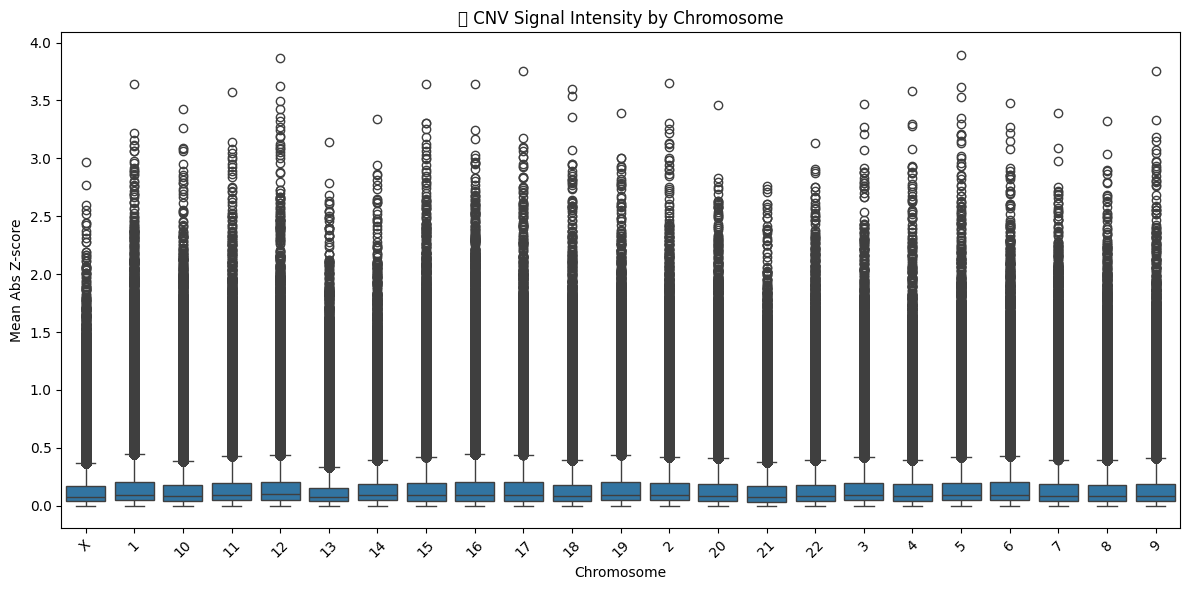

In [23]:
# Run this block first 
# Step 1: Clean and filter chromosome annotations
adata.var["chromosome"] = adata.var["chromosome"].astype(str).str.replace("chr", "").str.upper()
valid_chroms = [str(i) for i in range(1, 23)] + ["X", "Y"]
filtered_var = adata.var[adata.var["chromosome"].isin(valid_chroms)]

# Step 2: Subset the AnnData object to these genes
adata_chr = adata[:, filtered_var.index].copy()  # creates new adata_chr with only valid chromosomes

# Step 3: Proceed with visualization on this cleaned object
sc.pp.scale(adata_chr, zero_center=False, max_value=10)

# Step 4: Calculate per-chromosome CNV signal
chrom_scores = {}
for chrom in sorted(adata_chr.var["chromosome"].unique(), key=lambda x: (x not in "XY", x)):
    chrom_genes = adata_chr.var[adata_chr.var["chromosome"] == chrom].index
    if len(chrom_genes) < 10:
        continue
    expr = adata_chr[:, chrom_genes].X
    chrom_score = np.abs(expr).mean(axis=1)
    chrom_scores[chrom] = chrom_score

# Step 5: Melt and plot
cnv_df = pd.DataFrame({chrom: chrom_scores[chrom].A1 if hasattr(chrom_scores[chrom], 'A1') else chrom_scores[chrom] for chrom in chrom_scores})
cnv_df = cnv_df.melt(var_name="Chromosome", value_name="Mean Abs Z-score")

plt.figure(figsize=(12, 6))
sns.boxplot(data=cnv_df, x="Chromosome", y="Mean Abs Z-score", order=sorted(cnv_df["Chromosome"].unique(), key=lambda x: (x not in "XY", x)))
plt.xticks(rotation=45)
plt.title("📊 CNV Signal Intensity by Chromosome")
plt.tight_layout()
plt.show()

In [24]:
# Calculate the mean (or median, which is more robust to outliers) of Mean Abs Z-score for each chromosome
chromosome_cnv_summary = cnv_df.groupby("Chromosome")["Mean Abs Z-score"].mean().sort_values(ascending=False)
# You could also use .median() for a more robust measure:
# chromosome_cnv_summary = cnv_df.groupby("Chromosome")["Mean Abs Z-score"].median().sort_values(ascending=False)

print("📈 Chromosomes Ranked by Mean Abs Z-score:\n")
print(chromosome_cnv_summary)

print("\n--- Top 10 High Burden Chromosomes ---")
print(chromosome_cnv_summary.head(10))

📈 Chromosomes Ranked by Mean Abs Z-score:

Chromosome
12    0.183753
16    0.182901
1     0.181897
19    0.180139
6     0.177581
17    0.176925
11    0.176908
2     0.176887
5     0.173779
15    0.173269
7     0.169667
3     0.169286
20    0.167187
9     0.166362
8     0.163770
22    0.161271
14    0.161179
4     0.159861
18    0.159651
10    0.157984
21    0.145990
X     0.144107
13    0.139477
Name: Mean Abs Z-score, dtype: float64

--- Top 10 High Burden Chromosomes ---
Chromosome
12    0.183753
16    0.182901
1     0.181897
19    0.180139
6     0.177581
17    0.176925
11    0.176908
2     0.176887
5     0.173779
15    0.173269
Name: Mean Abs Z-score, dtype: float64


In [25]:
## Step-by-step CNV Scoring on Selected Chromosomes
# Step 1: Ensure chromosome formatting is consistent
adata.var["chromosome"] = adata.var["chromosome"].astype(str).str.replace("chr", "").str.upper()

# Step 2: Define high-CNV burden chromosomes based on literature
#selected_chroms = ["1", "6", "7", "10", "14", "18"]
#selected_chroms = ["1", "6", "7", "8", "10", "14", "17", "18"]
selected_chroms = [
    "16",
    "12",
    "1",
    "19",
    "17",
    "6",
    "2",
    "11",
    "15",
    "5"
]

# Step 3: Subset genes from these chromosomes
cnv_genes = adata.var[adata.var["chromosome"].isin(selected_chroms)]

# Step 4: Subset the AnnData object to CNV-related genes
adata_cnv = adata[:, cnv_genes.index].copy()

# Step 5: Normalize expression per gene (Z-score across all cells)
# This helps detect CNV-like expression shifts (amplifications/deletions)
sc.pp.scale(adata_cnv, zero_center=False, max_value=10)  # Clip extreme values

# Step 6: Calculate CNV score as mean absolute Z-score per cell
adata.obs['cnv_score'] = np.abs(adata_cnv.X).mean(axis=1)

In [26]:
adata.obs.head()

,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,subtype,celltype_subset,celltype_minor,celltype_major,S_score,G2M_score,phase,apoptosis_score,pct_counts_ribo,oxphos_score,proto_oncogenescore,cnv_reference,cnv_score
CID3586_AAGACCTCAGCATGAG,CID3586_AAGACCTCAGCATGAG,CID3586,4581,1689,1.506221,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial,-0.038055,-0.312865,G1,-0.632049,25.889544,0.495952,0.495952,tumor,0.128104
CID3586_AAGGTTCGTAGTACCT,CID3586_AAGGTTCGTAGTACCT,CID3586,1726,779,5.793743,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial,-0.048626,-0.187135,G1,-0.286432,26.303592,0.075952,0.075952,tumor,0.043722
CID3586_ACCAGTAGTTGTGGCC,CID3586_ACCAGTAGTTGTGGCC,CID3586,1229,514,1.383238,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial,-0.016913,-0.127680,G1,-0.211055,33.604557,-0.024524,-0.024524,tumor,0.024811
CID3586_ACCCACTAGATGTCGG,CID3586_ACCCACTAGATGTCGG,CID3586,1352,609,1.923077,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial,-0.021142,-0.100390,G1,-0.216080,31.878698,0.050714,0.050714,tumor,0.031385
CID3586_ACTGATGGTCAACTGT,CID3586_ACTGATGGTCAACTGT,CID3586,1711,807,13.325541,HER2+,Endothelial ACKR1,Endothelial ACKR1,Endothelial,0.012685,-0.171540,S,-0.306533,19.929866,-0.081905,-0.081905,tumor,0.052013


### OBS File Generation.

In [27]:
obs_file = adata.obs.copy()
obs_file.to_csv(f"""{assets}GSE176078_obs.csv""", index=False)

In [28]:
var_file = adata.var.copy()
var_file.to_csv(f"""{assets}GSE176078_var.csv""", index=False)